<a href="https://colab.research.google.com/github/Nusrahkhan/Eye-Disease-Classification/blob/main/Eye_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 97% 710M/736M [00:02<00:00, 270MB/s]
100% 736M/736M [00:04<00:00, 185MB/s]


In [3]:
!unzip *.zip

Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/1452_l

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
!pip install split-folders

In [6]:
import splitfolders.split  # or "import splitfolders.split" for newer versions

input_folder = "/content/dataset"  # path to your main dataset folder
output_folder = "output_dataset"

splitfolders.ratio(input_folder, output=output_folder,
                   seed=42, ratio=(0.8, 0.2))

Copying files: 4217 files [00:04, 966.70 files/s]


In [36]:
IMG_SIZE = 28
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "output_dataset/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "output_dataset/val",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
)

Found 3372 files belonging to 4 classes.
Found 845 files belonging to 4 classes.


In [37]:
class_names = train_ds.class_names
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [38]:
import matplotlib.pyplot as plt
# 1. Extract one batch
images, labels = next(iter(train_ds))

# 2. Extract the first image + label
img = images[0].numpy().astype("uint8")
label = labels[0].numpy()

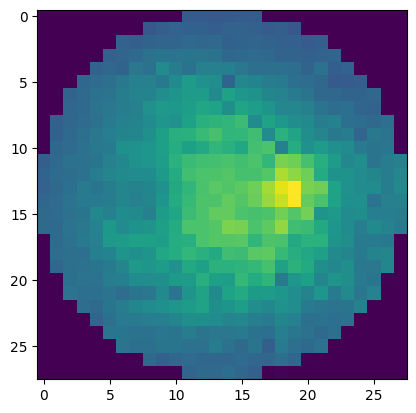

In [39]:
plt.imshow(img)

In [40]:
img

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 68],
        [ 68],
        [ 67],
        [ 68],
        [ 70],
        [ 70],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 65],
        [ 72],
        [ 75],
        [ 74],
        [ 74],
        [ 71],
        [ 76],
        [ 76],
        [ 73],
        [ 69],
        [ 72],
        [ 65],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 75],
        [ 72],
        [ 77],
        [ 78],
      

#Early Stopping On ANN

In [16]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


# ANN

In [ ]:
from tensorflow.keras.layers import Rescaling
model = Sequential([
    # normalize pixels if your dataset isn't already normalized:
    Rescaling(1./255, input_shape=(224, 224, 3)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')   # 4 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,228 (73.50 MB)

 Trainable params: 19,268,228 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=300,
    callbacks=[callback]
)

Epoch 1/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - loss: 6.3360 - val_loss: 3.9659
Epoch 2/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - loss: 3.2079 - val_loss: 3.2450
Epoch 3/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - loss: 3.0548 - val_loss: 6.1804
Epoch 4/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - loss: 3.1031 - val_loss: 3.4585
Epoch 5/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - loss: 3.0922 - val_loss: 2.4535
Epoch 6/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - loss: 1.4329 - val_loss: 4.1703
Epoch 7/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - loss: 3.1458 - val_loss: 2.1569
Epoch 8/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - loss: 1.1266 - val_loss: 1.7994
Epoch 9/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - loss: 1.2887 - val_loss: 2.5989
Epoch 10/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - loss: 1.3160 - val_loss: 0.7365
Epoch 11/300
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - loss: 0.9545 - val_loss: 1.3759
Epoch 12

In [ ]:
import numpy as np
img = tf.keras.utils.load_img("/content/normal.jpg", target_size=(224,224))
img = tf.keras.utils.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
print("Prediction:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: glaucoma


#LeNet Architecture

In [49]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dropout


In [58]:
model = Sequential()

# 6 layers
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

# 16 layers
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

#fully connected layers
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(84, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,916 (171.55 KB)

 Trainable params: 43,916 (171.55 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [61]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[callback]
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - accuracy: 0.3659 - loss: 1.3585 - val_accuracy: 0.5302 - val_loss: 0.9741
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.5425 - loss: 1.0117 - val_accuracy: 0.6130 - val_loss: 0.8634
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.5783 - loss: 0.9155 - val_accuracy: 0.6568 - val_loss: 0.7810
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.6180 - loss: 0.8402 - val_accuracy: 0.6651 - val_loss: 0.7553
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.6330 - loss: 0.7850 - val_accuracy: 0.6793 - val_loss: 0.7196
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.6545 - loss: 0.7637 - val_accuracy: 0.6899 - val_loss: 0.7283
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.6615 - loss: 0.7388 - val_accuracy: 0.7112 - val_loss: 0.6582
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.6713 -

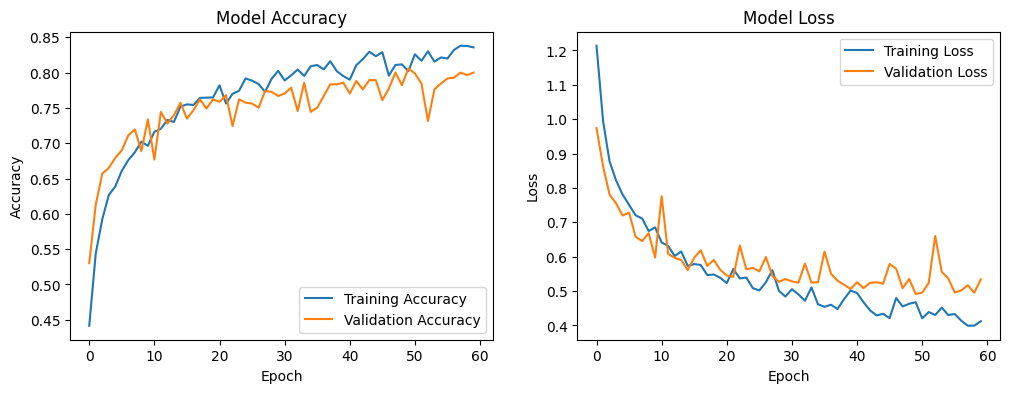

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Classifying Input Image

In [66]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def predict_image(img_path, model):
    """
    Classify a single image
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if you normalized during training

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100


#['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
    if(predicted_class == 1):
      print('cataract')
    elif(predicted_class == 2):
      print('diabetic_retinopathy')
    elif(predicted_class == 3):
      print('glaucoma')
    else:
      print('normal')
    print(f"Confidence: {confidence:.2f}%")

    return predicted_class, confidence

# Usage:
predicted_class, confidence = predict_image('/content/cataract.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
cataract
Confidence: 99.95%
